In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [205]:
insurance = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/insurance.csv')
insurance.shape

(1338, 7)

In [206]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [207]:
X = insurance[['age','smoker_yes','bmi_30','children']]
y = insurance['charges']

KeyError: "['smoker_yes', 'bmi_30'] not in index"

In [86]:
model.fit(X,y)
model.score(X,y)

0.7532949928792966

In [90]:
w,b = model.coef_, model.intercept_
w,b

(array([  260.37618859, 23827.58625248,  4184.22837673,   475.98511836]),
 -4549.7576832767845)

In [87]:
y_predict = model.predict(X)
y_predict

array([24224.97615234,  4797.22720637,  8352.95932896, ...,
        4321.24208801,   918.14227704, 35160.77607297])

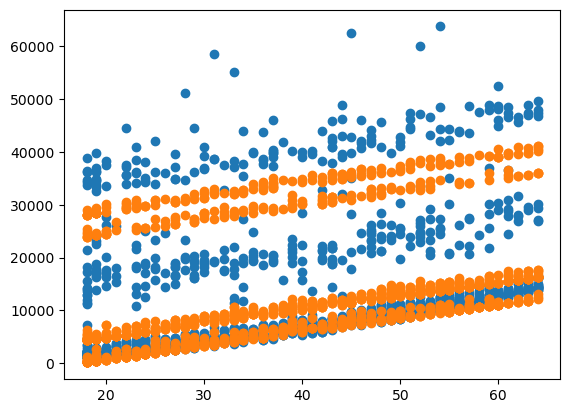

In [91]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(insurance.age,y_predict)
plt.show()

In [ ]:
#no much change if we add children so remove

In [ ]:
considering bmi_30 > 30 and smoker_yes in one feature

In [98]:
insurance['smoker_bmi_30'] = insurance.apply(lambda x: 1 if x['smoker_yes'] == 1 and x['bmi_30'] == 1 else 0,axis=1)

In [99]:
insurance.head()

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0


In [120]:
insurance[insurance.smoker_bmi_30 == 1]

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
14,27,male,42.130,0,southeast,39611.75770,1,1,1
19,30,female,35.300,0,southwest,36837.46700,1,1,1
23,34,female,31.920,1,northeast,37701.87680,1,1,1
29,31,male,36.300,2,southwest,38711.00000,1,1,1
30,22,male,35.600,0,southwest,35585.57600,1,1,1
...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,southeast,62592.87309,1,1,1
1301,62,male,30.875,3,northwest,46718.16325,1,1,1
1308,25,female,30.200,0,southwest,33900.65300,1,1,1
1313,19,female,34.700,2,southwest,36397.57600,1,1,1


In [102]:
X = insurance[['age','smoker_yes','bmi_30','smoker_bmi_30']]
y = insurance['charges']

In [103]:
model.fit(X,y)
model.score(X,y)

0.858519730403536

In [104]:
w,b = model.coef_, model.intercept_
w,b

(array([  267.83246571, 13421.19373409,   142.99549683, 19705.01983857]),
 -2189.9335606085133)

In [118]:
y_predict = model.predict(X)
y_predict

array([16312.77047702,  2698.2820746 ,  5380.48711176, ...,
        2698.2820746 ,  3502.94358575, 27578.03163307])

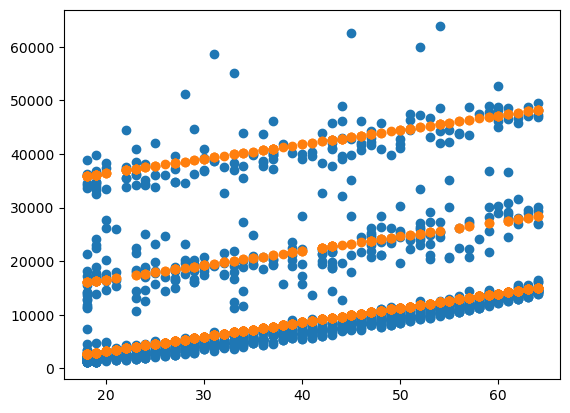

In [119]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show()

In [ ]:
Bottom line is for non smoker and bmi is not considered here because smoker_bmi_30 also becomes 0



<AxesSubplot:xlabel='age', ylabel='charges'>

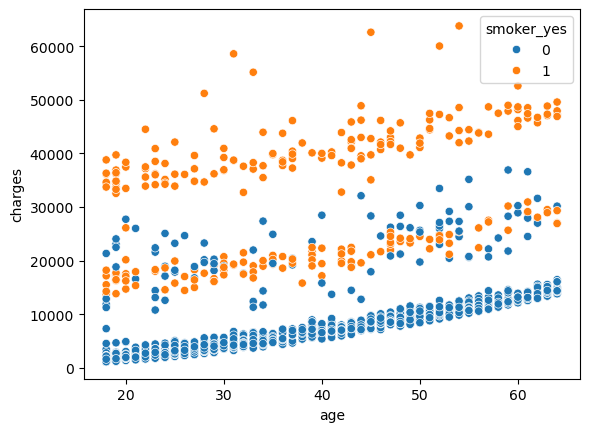

In [125]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='smoker_yes')

<AxesSubplot:xlabel='age', ylabel='charges'>

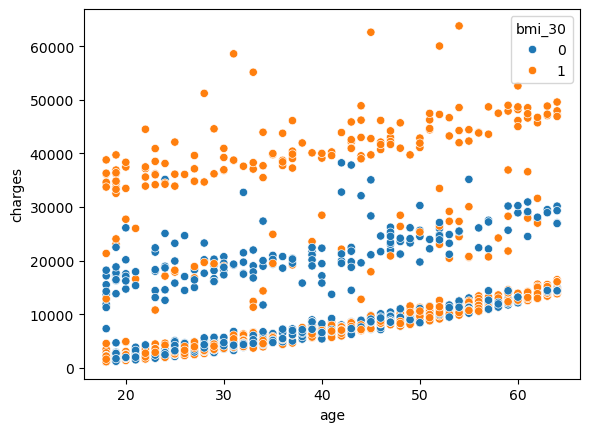

In [126]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='bmi_30')

<AxesSubplot:xlabel='age', ylabel='charges'>

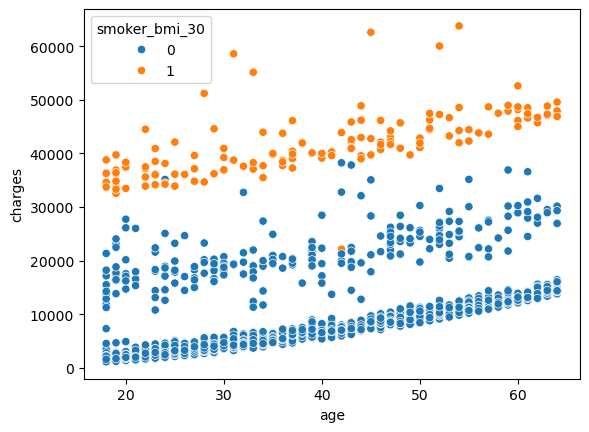

In [127]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='smoker_bmi_30')

In [115]:
X = insurance[['age','smoker_yes','smoker_bmi_30']]
y = insurance['charges']

In [116]:
model.fit(X,y)
model.score(X,y)

0.8584922811178519

In [117]:
w,b = model.coef_, model.intercept_
w,b

(array([  268.22050372, 13346.2678987 , 19847.51295014]), -2129.686992276811)

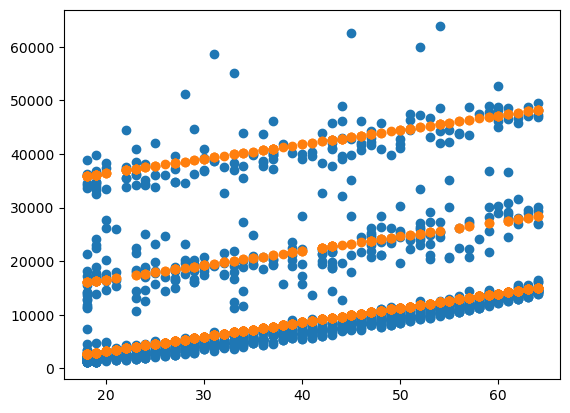

In [121]:
plt.scatter(x='age',y='charges',data=insurance)
plt.scatter(x=insurance.age,y=y_predict)
plt.show()

In [129]:
X.shape,w.shape

((1338, 3), (3,))

In [131]:
X.dot(w)+b

0       16312.770477
1        2698.282075
2        5380.487112
3        6721.589630
4        6453.369127
            ...     
1333    11281.338193
1334     2698.282075
1335     2698.282075
1336     3502.943586
1337    27578.031633
Length: 1338, dtype: float64

In [132]:
model.predict(X)

array([16312.77047702,  2698.2820746 ,  5380.48711176, ...,
        2698.2820746 ,  3502.94358575, 27578.03163307])

## Business Metrics

# 1) Average Charge per Customer

## Average Charges= ∑charges / Total Customers

In [108]:
insurance.charges.mean()

13270.422265141257

# 2) Total Premium Revenue

## Total Premium Revenue = ∑charges 

In [109]:
insurance.charges.sum()

17755824.990759

3) Charge Distribution by Gender

In [145]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0


# Charge Distribution by Smoker Status

## Metric: Average charges for smokers vs. non-smokers.

In [157]:
insurance[['charges','smoker_yes']].groupby('smoker_yes').mean()

,charges
smoker_yes,
0,8434.268298
1,32050.231832


# Charge Distribution by BMI

## Metric: Average charges by BMI category.

In [158]:
insurance[['charges','bmi_30']].groupby('bmi_30').mean()

,charges
bmi_30,
0,10713.666901
1,15552.335469


# Average Charge vs. Number of Children

## Metric: Average charge by number of children.

In [160]:
insurance[['charges','children']].groupby('children').mean()

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


In [162]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30
0,19,female,27.900,0,southwest,16884.92400,1,0,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0


## Risk Segmentation (Customer Profiling)

In [171]:
insurance['Risk_profile'] = insurance.apply(lambda x: "Risk" if x['smoker_bmi_30'] == 1 and x['age'] > 40 else "Not-At-Risk",axis=1)

In [172]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile
0,19,female,27.900,0,southwest,16884.92400,1,0,0,Not-At-Risk
1,18,male,33.770,1,southeast,1725.55230,0,1,0,Not-At-Risk
2,28,male,33.000,3,southeast,4449.46200,0,1,0,Not-At-Risk
3,33,male,22.705,0,northwest,21984.47061,0,0,0,Not-At-Risk
4,32,male,28.880,0,northwest,3866.85520,0,0,0,Not-At-Risk
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0,Not-At-Risk
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,Not-At-Risk
1335,18,female,36.850,0,southeast,1629.83350,0,1,0,Not-At-Risk
1336,21,female,25.800,0,southwest,2007.94500,0,0,0,Not-At-Risk


## Creating a Hypothesis for Retention/Churn: we can hypothesize that:

## Customers with higher charges, higher BMI, or those identified as higher risk might have a higher likelihood of churn.

## Customers with a Risk_profile of "low" or "medium," low charges, and low BMI might be considered retained.

In [174]:
insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [196]:
insurance['churn'] = insurance.apply(lambda x: 1 if x['age'] > 35 
                                     and x['smoker_bmi_30'] == 1 
                                     and x['Risk_profile'] == 'Risk' 
                                     and x['charges'] > 30000 
                                     else 0,axis = 1)

In [197]:
insurance[insurance.churn == 1]

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile,churn
39,60,male,39.900,0,southwest,48173.36100,1,1,1,Risk,1
55,58,male,36.955,2,northwest,47496.49445,1,1,1,Risk,1
86,57,female,31.160,0,northwest,43578.93940,1,1,1,Risk,1
94,64,female,31.300,2,southwest,47291.05500,1,1,1,Risk,1
109,63,male,35.090,0,southeast,47055.53210,1,1,1,Risk,1
...,...,...,...,...,...,...,...,...,...,...,...
1241,64,male,36.960,2,southeast,49577.66240,1,1,1,Risk,1
1284,61,male,36.300,1,southwest,47403.88000,1,1,1,Risk,1
1300,45,male,30.360,0,southeast,62592.87309,1,1,1,Risk,1
1301,62,male,30.875,3,northwest,46718.16325,1,1,1,Risk,1


In [198]:
insurance

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile,churn
0,19,female,27.900,0,southwest,16884.92400,1,0,0,Not-At-Risk,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0,Not-At-Risk,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0,Not-At-Risk,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0,Not-At-Risk,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0,Not-At-Risk,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0,Not-At-Risk,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,Not-At-Risk,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0,Not-At-Risk,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0,Not-At-Risk,0


## churn rate = No.of customers churning/Total number of customers

In [199]:
#Total customers = 68/1336

(68/1338)*100

5.082212257100149

5% is the churn rate

## Calculating Retention Rate

In [201]:
insurance[insurance.churn == 0]

,age,gender,bmi,children,region,charges,smoker_yes,bmi_30,smoker_bmi_30,Risk_profile,churn
0,19,female,27.900,0,southwest,16884.92400,1,0,0,Not-At-Risk,0
1,18,male,33.770,1,southeast,1725.55230,0,1,0,Not-At-Risk,0
2,28,male,33.000,3,southeast,4449.46200,0,1,0,Not-At-Risk,0
3,33,male,22.705,0,northwest,21984.47061,0,0,0,Not-At-Risk,0
4,32,male,28.880,0,northwest,3866.85520,0,0,0,Not-At-Risk,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,1,0,Not-At-Risk,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,Not-At-Risk,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0,Not-At-Risk,0
1336,21,female,25.800,0,southwest,2007.94500,0,0,0,Not-At-Risk,0


## Retention Rate = Number of customers retaining/Total no.of customers 

In [202]:
1270/1338

0.9491778774289985

Retention rate is 94%